In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Estefania Zapata Valderrama
*Métodos computacionales*

---

#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid, simpson, quad, fixed_quad, tplquad
import pandas as pd
from numpy import sin, pi
from scipy.special import roots_legendre

##Integral #1

In [34]:
f = lambda x: np.exp(3 * x) * np.sin(x)
a, b = 0, np.pi / 4
exacto, _ = quad(f, a, b)
print(f"Valor exacto (quad): {exacto:.4f}")
n = 100
x = np.linspace(a, b, n)
y = f(x)

trap = trapezoid(y, x)
simp = simpson(y, x)

print(f"Integral con método del trapecio (n={n}): {trap:.4f}")
print(f"Error trapecio: {abs(trap - exacto):.2e}")

print(f"Integral con método de Simpson (n={n}): {simp:.4f}")
print(f"Error Simpson: {abs(simp - exacto):.2e}")

Valor exacto (quad): 1.5921
Integral con método del trapecio (n=100): 1.5922
Error trapecio: 1.51e-04
Integral con método de Simpson (n=100): 1.5921
Error Simpson: 5.96e-08


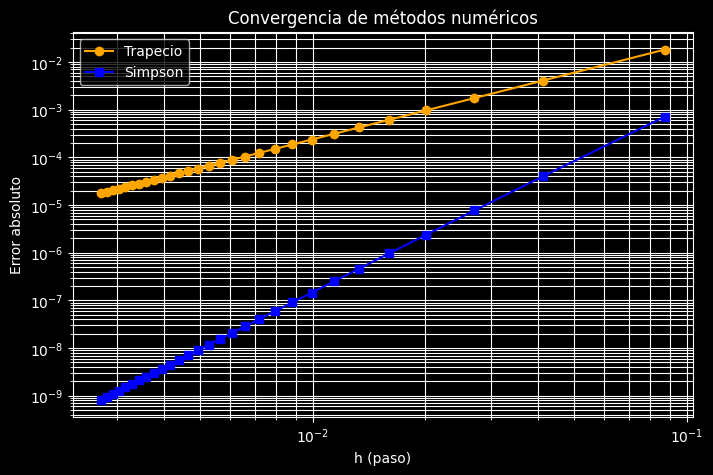

In [35]:
hs = []
error_trap = []
error_simp = []

for n in range(10, 300, 10):
    x = np.linspace(a, b, n)
    y = f(x)

    h = (b - a) / (n - 1)
    hs.append(h)

    int_trap = trapezoid(y, x)
    int_simp = simpson(y, x)

    error_trap.append(abs(int_trap - exacto))
    error_simp.append(abs(int_simp - exacto))

plt.style.use('dark_background')
plt.figure(figsize=(8,5))
plt.loglog(hs, error_trap, 'o-', label='Trapecio', color='orange')
plt.loglog(hs, error_simp, 's-', label='Simpson', color = 'blue')
plt.xlabel('h (paso)')
plt.ylabel('Error absoluto')
plt.title('Convergencia de métodos numéricos')
plt.legend()
plt.grid(True, which='both')
plt.show()


In [36]:
n_vals = [2, 4, 6, 8, 10, 20]
resultados = []
errores = []

for n in n_vals:
    r, _ = fixed_quad(f, a, b, n=n)
    resultados.append(r)
    errores.append(abs(r - exacto))

df = pd.DataFrame({
    'n': n_vals,
    'Integral': resultados,
    'Error': errores
})
print(df)

    n  Integral         Error
0   2  1.568751  2.334684e-02
1   4  1.592097  3.245011e-07
2   6  1.592098  2.441958e-11
3   8  1.592098  8.881784e-16
4  10  1.592098  1.776357e-15
5  20  1.592098  1.332268e-15


#Integral #2



In [37]:
f2 = lambda x: 1 / (x * np.log(x))
a2, b2 = np.e, np.e + 1

exacto2, _ = quad(f2, a2, b2)
print(f"\nValor exacto (quad) segunda integral: {exacto2:.4f}")

n = 40
x2 = np.linspace(a2, b2, n)
y2 = f2(x2)

trap2 = trapezoid(y2, x2)
simp2 = simpson(y2, x2)

print(f"Integral Trapecio (n={n}): {trap2:.4f}")
print(f"Error Trapecio: {abs(trap2 - exacto2):.2e}")

print(f"Integral Simpson (n={n}): {simp2:.4f}")
print(f"Error Simpson: {abs(simp2 - exacto2):.2e}")



Valor exacto (quad) segunda integral: 0.2725
Integral Trapecio (n=40): 0.2725
Error Trapecio: 9.51e-06
Integral Simpson (n=40): 0.2725
Error Simpson: 4.81e-10


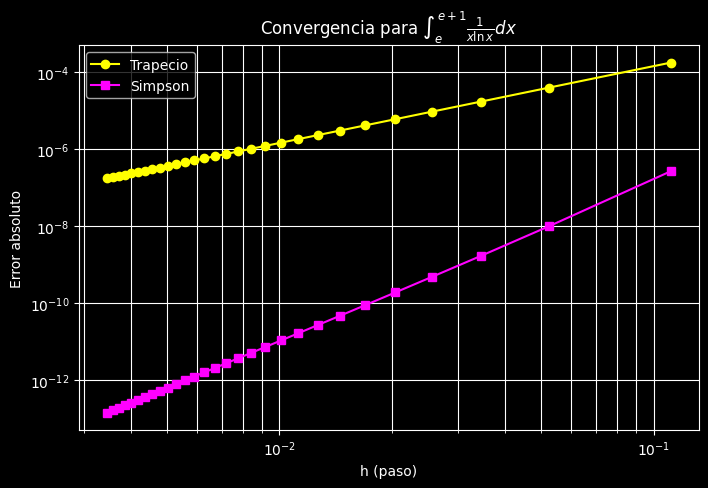

In [38]:
hs2 = []
error_trap2 = []
error_simp2 = []

for n in range(10, 300, 10):
    x2 = np.linspace(a2, b2, n)
    y2 = f2(x2)

    h2 = (b2 - a2) / (n - 1)
    hs2.append(h2)

    int_trap2 = trapezoid(y2, x2)
    int_simp2 = simpson(y2, x2)

    error_trap2.append(abs(int_trap2 - exacto2))
    error_simp2.append(abs(int_simp2 - exacto2))

plt.style.use('dark_background')
plt.figure(figsize=(8,5))
plt.loglog(hs2, error_trap2, 'o-', label='Trapecio', color='yellow')
plt.loglog(hs2, error_simp2, 's-', label='Simpson', color='magenta')
plt.xlabel('h (paso)')
plt.ylabel('Error absoluto')
plt.title('Convergencia para $\\int_e^{e+1} \\frac{1}{x\\ln x} dx$')
plt.legend()
plt.grid(True, which='both')
plt.show()


In [39]:
n_vals = [2, 4, 6, 8, 10, 20]
resultados2 = []
errores2 = []

for n in n_vals:
    r, _ = fixed_quad(f2, a2, b2, n=n)
    resultados2.append(r)
    errores2.append(abs(r - exacto2))

df2 = pd.DataFrame({
    'n': n_vals,
    'Integral': resultados2,
    'Error': errores2
})
print(df2)

    n  Integral         Error
0   2  0.272411  1.030078e-04
1   4  0.272514  1.932125e-08
2   6  0.272514  3.373579e-12
3   8  0.272514  5.551115e-16
4  10  0.272514  5.551115e-17
5  20  0.272514  0.000000e+00


#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [40]:
# integro en z desde 0 hasta x*y
def integral1(y, x):
    integrando = lambda z: (1 / y) * np.sin(z / y) if y != 0 else 0
    resultado, _ = quad(integrando, 0, x * y)
    return resultado

#integro en y desde 0 hasta x
def integral2(x):
    integrando = lambda y: integral1(y, x)
    resultado, _ = quad(integrando, 0, x)
    return resultado

#integro en x desde 0 hasta pi
resultado_final, error_quad = quad(integral2, 0, np.pi)

print(f"Resultado con quad: {resultado_final:.10f}")



Resultado con quad: 6.9348022005


In [41]:
f_triple = lambda z, y, x: (1 / y) * sin(z / y) if y != 0 else 0

resultado_tplquad, error_tplquad = tplquad(
    f_triple,
    0, pi,
    lambda x: 0, lambda x: x,
    lambda x, y: 0, lambda x, y: x * y
)
print(f"Resultado con tplquad: {resultado_tplquad:.10f}")


Resultado con tplquad: 6.9348022005


Con quad y con tplquad los resultados son exactamente igual con 10 cifras significativas.

#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [42]:
def gauss_quad_ab(func, a, b, n):
    """
    Calcula la integral de una función en el intervalo [a, b]
    usando cuadratura gaussiana de Legendre.

    Parameters:
    - func: función a integrar
    - a, b: límites de integración
    - n: número de puntos (grado del polinomio de Legendre)

    Returns:
    - Aproximación de la integral
    """
    # Raíces y pesos en [-1, 1]
    x_std, w_std = roots_legendre(n)

    # Cambio de variable: transformar x de [-1,1] a [a,b]
    x_ab = 0.5 * (b - a) * x_std + 0.5 * (b + a)

    # Evaluar suma ponderada
    integral = 0.5 * (b - a) *np.sum( w_std * func(x_ab))
    return integral


In [43]:
#integro en z de 0 a x*y
def gauss_z(y, x, n):
    if y == 0:
        return 0
    integrando = lambda z: (1 / y) * np.sin(z / y)
    return gauss_quad_ab(integrando, 0, x * y, n)

# integro en y de 0 a x
def gauss_y(x, n):
    integrando = lambda y: gauss_z(y, x, n)
    return gauss_quad_ab(np.vectorize(integrando), 0, x, n)

# integro en x de 0 a pi
n = 10
resultado_gauss = gauss_quad_ab(np.vectorize(lambda x: gauss_y(x, n)), 0, np.pi, n)
resultado_gauss


np.float64(6.934802200544679)

#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [44]:
f1 = lambda x: 1 / np.sqrt(np.tan(x))
x1 = np.linspace(0.001, np.pi/2 - 0.001, 1000)
y1 = f1(x1)

I1_trap = trapezoid(y1, x1)
I1_simp = simpson(y1, x1)
I1_quad, _ = quad(f1, 0, np.pi/2)

print("Resultados Integral 1")
print(f"  Trapecio:   {I1_trap:.4f}")
print(f"  Simpson:    {I1_simp:.4f}")
print(f"  Cuadratura: {I1_quad:.4f}")

Resultados Integral 1
  Trapecio:   2.1611
  Simpson:    2.1587
  Cuadratura: 2.2214


In [45]:
f2 = lambda x: np.cos(x)/x**3
I2_quad, _ = quad(f2, 1, np.inf)

x2 = np.linspace(1, 100, 10000)
y2 = f2(x2)
I2_trap = trapezoid(y2, x2)
I2_simp = simpson(y2, x2)


print("Resultados integral 2")
print(f"  Trapecio:   {I2_trap:.4f}")
print(f"  Simpson:    {I2_simp:.4f}")
print(f"  Cuadratura: {I2_quad:.4f}")



Resultados integral 2
  Trapecio:   0.0181
  Simpson:    0.0181
  Cuadratura: 0.0181


/tmp/ipython-input-45-1956600642.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I2_quad, _ = quad(f2, 1, np.inf)


In [46]:
f3 = lambda y, x: 1 / np.sqrt(1 - y**2)
I3_quad, _ = dblquad(f3, 0, np.pi/4, lambda x: 0, lambda x: np.sin(x))

x3 = np.linspace(0, np.pi/4, 200)
dx = x3[1] - x3[0]
z_trap = 0
z_simp = 0

for xi in x3:
    y = np.linspace(0, np.sin(xi), 200)
    fy = 1 / np.sqrt(1 - y**2)
    z_trap += trapezoid(fy, y) * dx
    z_simp += simpson(fy, y) * dx

print("Resultados de la integral 3")
print(f"  Trapecio:   {z_trap:.4f}")
print(f"  Simpson:    {z_simp:.4f}")
print(f"  Cuadratura: {I3_quad:.4f}")


Resultados de la integral 3
  Trapecio:   0.3100
  Simpson:    0.3100
  Cuadratura: 0.3084
